<a href="https://colab.research.google.com/github/Ashfakur-Rahman/HDD-Visualization-DataScience-SUST/blob/main/202454206017_Assignment01_Python.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score, mean_squared_error

In [2]:
# 1. Load Dataset
df = pd.read_csv('student_data.csv')
df.head()

,Stress,SleepHours,Workload,PhysicalActivity,DietQuality,SocialSupport,AnxietyScore,Depression
0,54.967142,5.505206,51.354829,3.553010,5.225404,7.634558,77.814288,38.327894
1,48.617357,5.827783,26.167520,2.409992,4.227070,4.842510,54.272070,24.181902
2,56.476885,7.396752,53.044089,3.043117,5.220136,4.281782,46.499119,24.921756
3,65.230299,7.232444,60.334568,4.917678,5.977936,5.992914,36.835427,35.321209
4,47.658466,6.474918,46.201524,3.286649,5.087948,5.642612,33.362324,16.932609


In [3]:
numeric_df = df.select_dtypes(include=[np.number])
numeric_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 300 entries, 0 to 299
Data columns (total 8 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Stress            300 non-null    float64
 1   SleepHours        300 non-null    float64
 2   Workload          300 non-null    float64
 3   PhysicalActivity  300 non-null    float64
 4   DietQuality       300 non-null    float64
 5   SocialSupport     300 non-null    float64
 6   AnxietyScore      300 non-null    float64
 7   Depression        300 non-null    float64
dtypes: float64(8)
memory usage: 18.9 KB


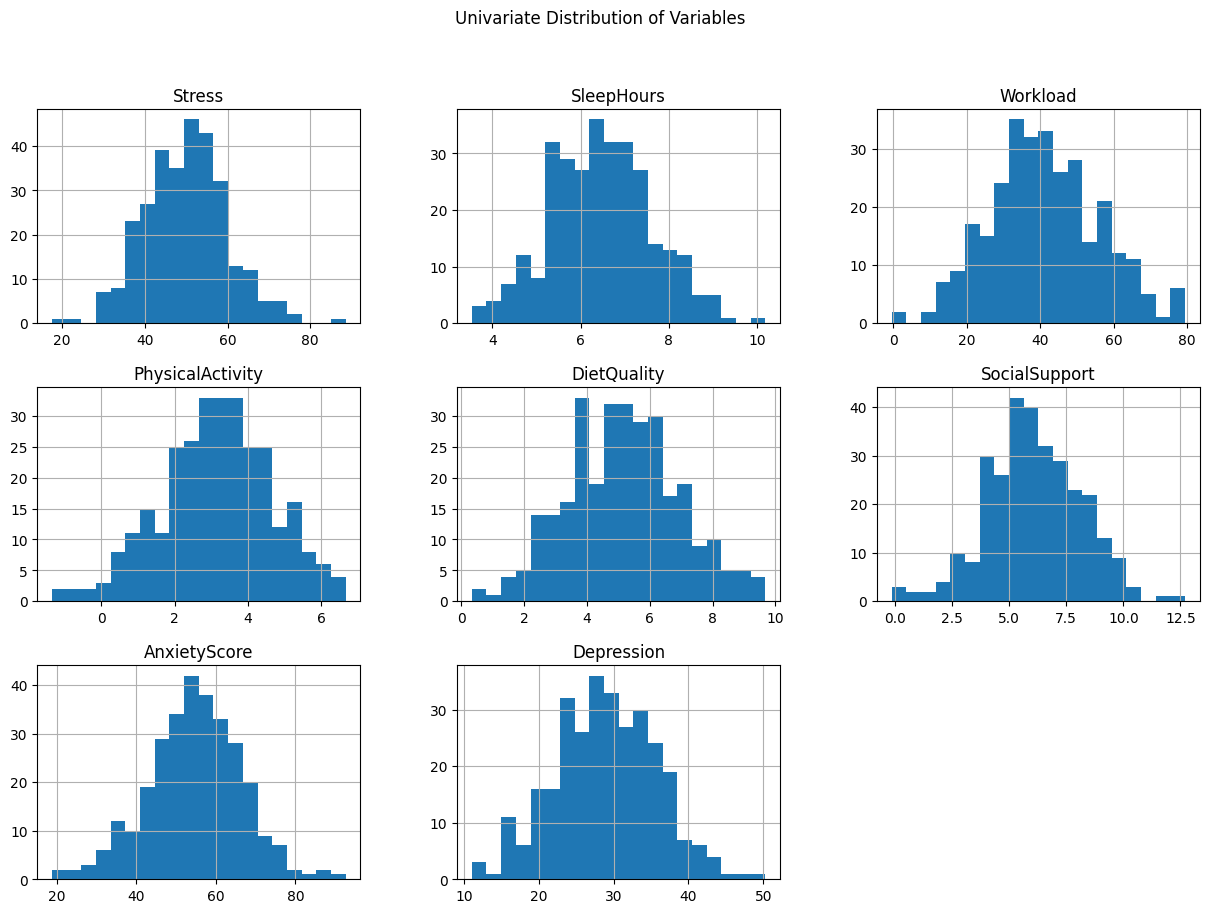

In [4]:
numeric_df.hist(figsize=(15,10), bins=20)
plt.suptitle('Univariate Distribution of Variables')
plt.show()

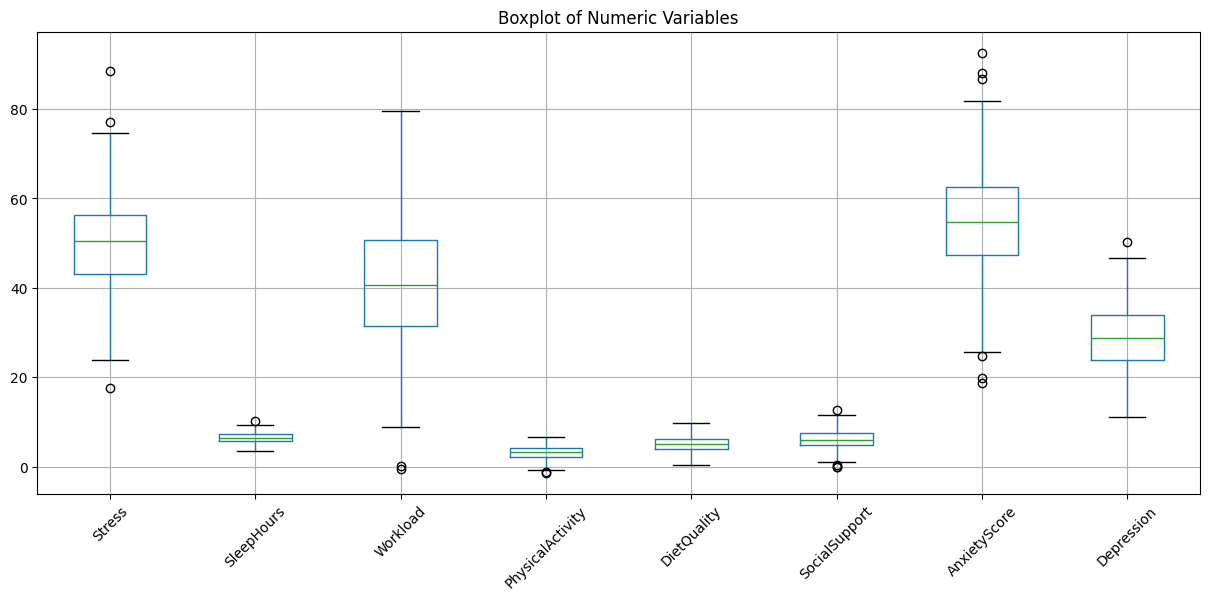

In [5]:
plt.figure(figsize=(15,6))
numeric_df.boxplot()
plt.xticks(rotation=45)
plt.title('Boxplot of Numeric Variables')
plt.show()

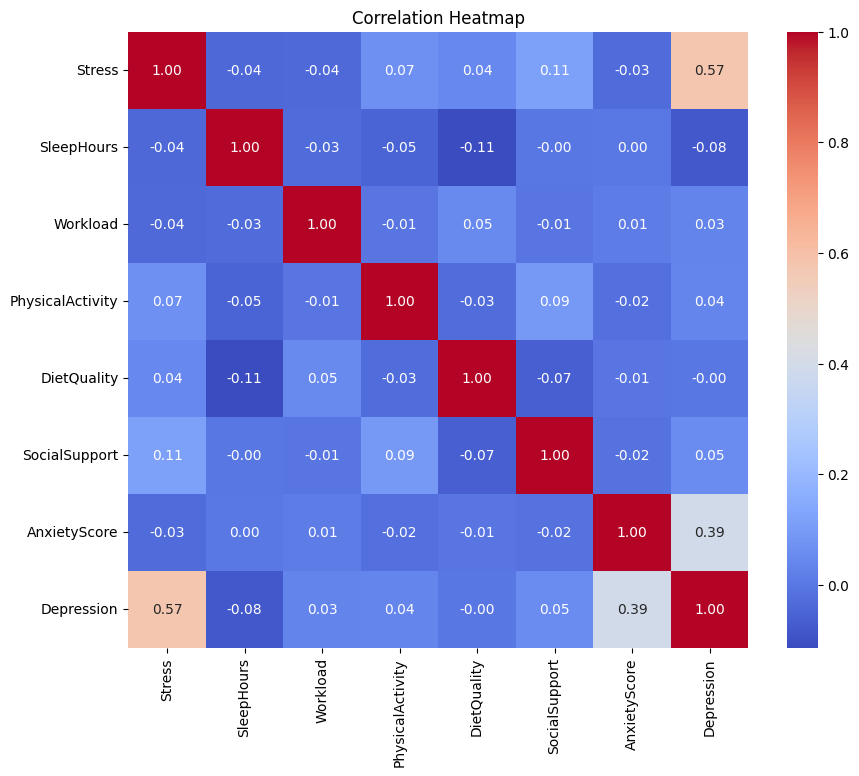

In [6]:
corr_matrix = numeric_df.corr()
corr_matrix
plt.figure(figsize=(10,8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Heatmap')
plt.show()

In [9]:
y = numeric_df['Depression']  # Change if needed
X = numeric_df.drop(columns=['Depression'])

In [10]:
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

In [11]:
pca = PCA()
X_pca = pca.fit_transform(X_scaled)
eigenvalues = pca.explained_variance_
explained_variance = pca.explained_variance_ratio_
cumulative_variance = np.cumsum(explained_variance)
pca_summary = pd.DataFrame({
    'Eigenvalue': eigenvalues,
    'Explained Variance Ratio': explained_variance,
    'Cumulative Variance': cumulative_variance
})
pca_summary

,Eigenvalue,Explained Variance Ratio,Cumulative Variance
0,1.211919,0.172554,0.172554
1,1.156289,0.164634,0.337188
2,1.008378,0.143574,0.480762
3,0.986628,0.140477,0.621239
4,0.947024,0.134838,0.756077
5,0.880795,0.125408,0.881485
6,0.832378,0.118515,1.000000


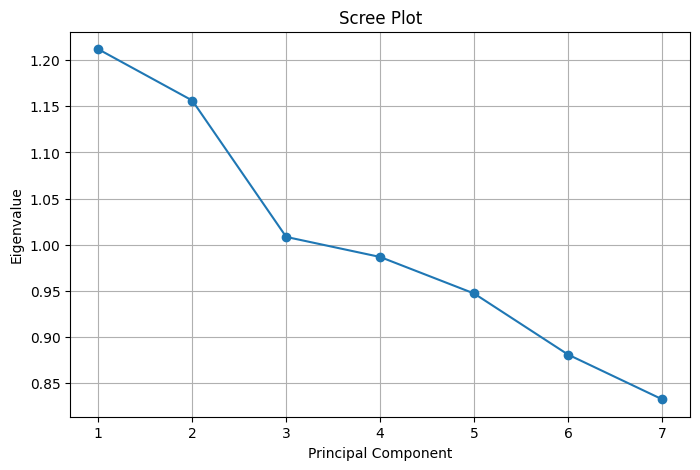

In [12]:
plt.figure(figsize=(8,5))
plt.plot(range(1,len(eigenvalues)+1), eigenvalues, marker='o')
plt.xlabel('Principal Component')
plt.ylabel('Eigenvalue')
plt.title('Scree Plot')
plt.grid()
plt.show()

In [13]:
loadings = pd.DataFrame(pca.components_.T,
                        columns=[f'PC{i+1}' for i in range(len(pca.components_))],
                        index=X.columns)
loadings

,PC1,PC2,PC3,PC4,PC5,PC6,PC7
Stress,0.564762,0.131755,-0.194664,0.206336,-0.493468,0.254366,-0.524408
SleepHours,-0.190326,-0.607448,-0.083558,-0.149795,-0.361983,0.609475,0.250742
Workload,-0.134250,0.321474,0.548739,-0.665067,-0.277131,0.113445,-0.213381
PhysicalActivity,0.511186,-0.006876,0.282503,-0.070658,0.621733,0.510943,0.078911
DietQuality,-0.046098,0.684667,-0.195028,0.127326,-0.189395,0.321787,0.579173
SocialSupport,0.571573,-0.202602,0.254976,-0.109413,-0.320637,-0.421481,0.524232
AnxietyScore,-0.191484,-0.020956,0.686406,0.677862,-0.153055,0.093345,-0.010265


In [14]:
n_components = np.argmax(cumulative_variance >= 0.80) + 1
n_components

np.int64(6)

In [15]:
X_pca_selected = X_pca[:, :n_components]
X_train, X_test, y_train, y_test = train_test_split(X_pca_selected, y, test_size=0.2, random_state=42)
pcr_model = LinearRegression()
pcr_model.fit(X_train, y_train)

LinearRegression()

In [16]:
y_pred = pcr_model.predict(X_test)
r2 = r2_score(y_test, y_pred)
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
print('PCR Model Performance')
print('R-squared:', r2)
print('RMSE:', rmse)

PCR Model Performance
R-squared: 0.20951939637118444
RMSE: 5.664199737310503
